# DATA ANALYTICS CA1

**Student Name:** ALIF AL RAZI

**Student Number:** A00047246  
**Duration:** 60 minutes  
**Total Marks:** 100

---

## INSTRUCTIONS:
1. Replace `STUDENT_NUMBER` below with YOUR actual student number (numbers only)
2. Run each cell in sequence
3. Answer all questions in the designated cells
4. **DO NOT** change the random seed or data generation code


---

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("Libraries imported successfully!")

Libraries imported successfully!


---
# SECTION 0: DATA GENERATION (10 marks)
---

In [7]:
# REPLACE THIS WITH THE NUMERIC PART OF YOUR STUDENT ID (e.g., if your Student ID is A12345678, set STUDENT_NUMBER = 12345678)
STUDENT_NUMBER = 47246

# Set random seed for reproducibility
np.random.seed(STUDENT_NUMBER)

print(f"Exam initialized for Student Number: {STUDENT_NUMBER}")
print("=" * 60)

Exam initialized for Student Number: 47246


In [28]:

# Generate personalized dataset
n_samples = 200 + (STUDENT_NUMBER % 100)
base_offset = (STUDENT_NUMBER % 50)

# Creating a realistic sales dataset
data = {
    'product_id': np.arange(1, n_samples + 1),
    'sales_amount': np.random.gamma(2, 50, n_samples) + base_offset,
    'customer_age': np.random.normal(35 + (STUDENT_NUMBER % 20), 12, n_samples).astype(int),
    'discount_percent': np.random.uniform(0, 30, n_samples),
    'satisfaction_score': np.random.choice([1, 2, 3, 4, 5], n_samples, p=[0.05, 0.10, 0.25, 0.35, 0.25])
}

df = pd.DataFrame(data)
df


,product_id,sales_amount,customer_age,discount_percent,satisfaction_score
0,1,83.24,33,0.28,2
1,2,123.68,31,8.30,4
2,3,177.70,45,20.85,4
3,4,95.16,38,0.57,5
4,5,161.91,45,22.99,4
...,...,...,...,...,...
241,242,162.36,21,13.66,1
242,243,135.02,16,13.47,3
243,244,238.51,28,29.96,5
244,245,62.76,50,28.51,3


In [29]:
# Introduce some missing values (personalized pattern)
missing_indices = np.random.choice(df.index, size=int(0.08 * n_samples), replace=False)
df.loc[missing_indices, 'sales_amount'] = np.nan

# Introduce some outliers
outlier_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[outlier_indices, 'sales_amount'] = df['sales_amount'].mean() * np.random.uniform(3, 5, 5)

print(f"Dataset created with {len(df)} records")
print(f"\nYour dataset preview:")
df.head(10)

Dataset created with 246 records

Your dataset preview:


,product_id,sales_amount,customer_age,discount_percent,satisfaction_score
0,1,83.24,33,0.28,2
1,2,123.68,31,8.30,4
2,3,177.70,45,20.85,4
3,4,95.16,38,0.57,5
4,5,161.91,45,22.99,4
5,6,133.43,22,14.09,5
6,7,125.92,37,15.70,4
7,8,195.69,35,27.86,4
8,9,101.07,32,5.77,5
9,10,118.02,39,29.99,5


---
# SECTION 1: DATA EXPLORATION (10 marks)
---

## Q1: Basic Dataset Information (10 marks)

Write code to display:
- a) Shape of the dataset **(2 mark)**
- b) Data types of all columns **(2 mark)**
- c) Count of missing values per column **(4 marks)**
- d) Basic information about the dataset **(2 mark)**

In [30]:
# YOUR CODE HERE (you also can create different cells to show your answer):

# a) Shape of the dataset

print(df.shape)


# b) Data types

print(df.dtypes)


# c) Missing values count

print(df.isnull().sum())


# d) Dataset info

print(df.info())


(246, 5)
product_id              int64
sales_amount          float64
customer_age            int64
discount_percent      float64
satisfaction_score      int64
dtype: object
product_id             0
sales_amount          19
customer_age           0
discount_percent       0
satisfaction_score     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          246 non-null    int64  
 1   sales_amount        227 non-null    float64
 2   customer_age        246 non-null    int64  
 3   discount_percent    246 non-null    float64
 4   satisfaction_score  246 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 9.7 KB
None


---
# SECTION 2: DATA PREPROCESSING (20 marks)
---

## Q2: Handle Missing Values (20 marks)

**Scenario:** You're preparing this sales data for a machine learning model. The 'sales_amount' column has missing values.

**a)** Comment on the suitability of each of the following methods for this scenario: **(4*3 = 12 marks)**
   - Remove rows with missing values
   - Fill with mean
   - Fill with median
   - Forward fill
   

**b)** Choose one of the aforementioned methods to fix missing values for the 'sales_amount' column and create a new dataframe called 'df_clean' **(8 marks)**

## YOUR ANSWER FOR (a) :

*   Remove rows with missing values -
*   Fill with mean -
*   Fill with median -
*   Forward fill -



---





In [33]:
# Remove rows with missing values -

df1 = df
df2 = df
df3 = df
df4 = df

print(df1.dropna(inplace=True))

print(df1.shape)


# Fill with mean -
print(df2.fillna(df['sales_amount'].mean(), inplace=True))
print(df2.isnull().sum())

# Fill with median -
print(df3.fillna(df['sales_amount'].median(), inplace=True))
print(df3.isnull().sum())

# Forward fill -
print(df4.fillna(method='ffill', inplace=True))
print(df4.isnull().sum())

None
(227, 5)
None
product_id            0
sales_amount          0
customer_age          0
discount_percent      0
satisfaction_score    0
dtype: int64
None
product_id            0
sales_amount          0
customer_age          0
discount_percent      0
satisfaction_score    0
dtype: int64
None
product_id            0
sales_amount          0
customer_age          0
discount_percent      0
satisfaction_score    0
dtype: int64


/tmp/ipython-input-3054662145.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df4.fillna(method='ffill', inplace=True))


In [35]:
# YOUR CODE FOR (b):
df_clean = df.fillna(df['sales_amount'].median(), inplace=True)




# Verify no missing values remain
print(df.isnull().sum())

product_id            0
sales_amount          0
customer_age          0
discount_percent      0
satisfaction_score    0
dtype: int64


---
# SECTION 3: BOX-PLOT VISUALIZATIONS (30 marks)
---

## Q3: Box Plot for Outlier Detection

- a) Create and display a box plot of 'sales_amount' **(15 marks)**
- b) Identify and print how many outliers exist using IQR method **(15 marks)**
  - **Hint:** Outliers are values < Q1 - 1.5×IQR or > Q3 + 1.5×IQR

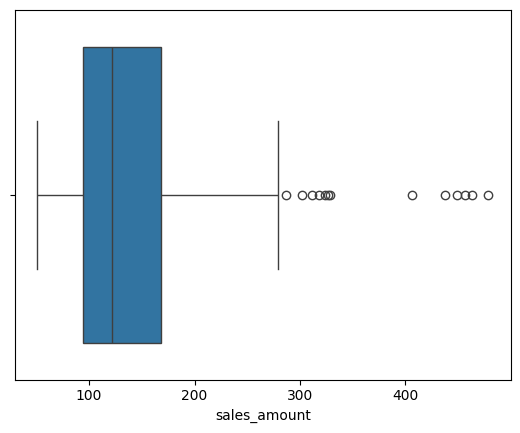

     product_id  sales_amount  customer_age  discount_percent  \
19           20        317.75            35             21.40   
33           34        437.64            45             12.64   
45           46        323.41            49              5.88   
58           59        456.38            58             18.34   
59           60        463.42            32             22.74   
92           93        326.11            39             24.36   
103         104        449.16            37             28.65   
112         113        328.38            36             25.72   
122         123        405.99            57             24.06   
138         139        478.51            45             24.11   
141         142        286.75            37             25.91   
150         151        302.15            45             16.82   
175         176        311.00            50              7.46   

     satisfaction_score  
19                    4  
33                    5  
45         

In [40]:
# YOUR CODE HERE:



# a) Create box plot
sns.boxplot(x=df['sales_amount'])
plt.show()



# b) Calculate number of outliers using IQR method
Q1 = df['sales_amount'].quantile(0.25)
Q3 = df['sales_amount'].quantile(0.75)
IQR = Q3 - Q1
print(df[(df['sales_amount'] < (Q1 - 1.5 * IQR)) | (df['sales_amount'] > (Q3 + 1.5 * IQR))])

---
# SECTION 4: SCENARIO-BASED ANALYSIS (30 marks)
---

## Q4: Business Analytics Scenario

**Scenario:**
Your manager wants to identify "high-value" transactions for a special promotion. She defines high-value as transactions in the **top 15%** of sales amounts.

Additionally, she wants to understand if there's a relationship between customer ages and high-value purchases.

Complete the following tasks:

### a) Create a new column 'is_high_value' that marks top 15% of sales (10 marks)

In [42]:
# YOUR CODE HERE:
df['is_high_value'] = pd.qcut(df['sales_amount'], q=15, labels=False)
df


,product_id,sales_amount,customer_age,discount_percent,satisfaction_score,is_high_value
0,1,83.24,33,0.28,2,2
1,2,123.68,31,8.30,4,7
2,3,177.70,45,20.85,4,11
3,4,95.16,38,0.57,5,3
4,5,161.91,45,22.99,4,10
...,...,...,...,...,...,...
241,242,162.36,21,13.66,1,10
242,243,135.02,16,13.47,3,8
243,244,238.51,28,29.96,5,13
244,245,62.76,50,28.51,3,0


### b) Check if there is any correlation between customer age and them being high value (10 marks)


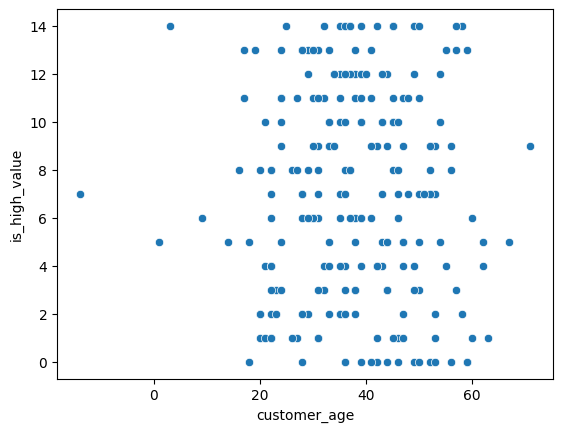

Heatmap


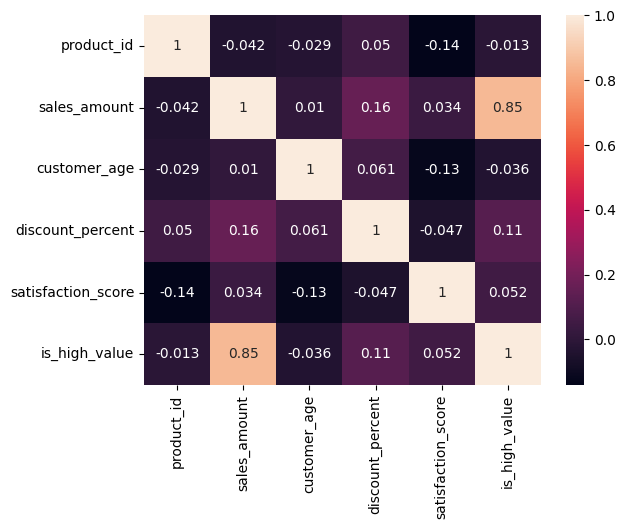

In [50]:
# YOUR CODE HERE:
sns.scatterplot(x='customer_age', y='is_high_value', data=df)
plt.show()
print("Heatmap")
sns.heatmap(df.corr(), annot=True)
plt.show()


### c) Write a 3-4 sentence business recommendation based on your findings (10 marks)

### YOUR ANSWER to Q 4 (c)

**YOUR RECOMMENDATION:**

It is seen that the correlation between customer age and high value is negligible i.e -0.036. Most of the customers age are between 20 to 60. In this age range there is both high value and low value customer. so high value is totally depend on the customer's transactions in the top 15% of sales amounts. So she can set the age range 20 to 60 and high value.





---
# END OF EXAM
---

## Before submitting:
1. ✓ Ensure all code cells have been run
2. ✓ Verify your student number is correct at the top
3. ✓ Check all answers are complete
4. ✓ Save your notebook, rename it: **studentid_CA1.ipynb**


#### Good luck! Remember you would need to download **.ipynb** of the completed notebook and upload it to Brightspace!